# Bondora Peer to Peer Lending Loan

## ----------------- APRP Project -----------------
  ### ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎‎ ‎ ‎ ‎  ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ 2022/23

* Alice Mangara - 2020242411
* Afonso Rodrigues - 2020242400

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

#Evaluation Metrics
from sklearn.metrics import f1_score, confusion_matrix, balanced_accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from copy import deepcopy

import re

In [2]:
df = pd.read_csv('LoanData_Bondora.csv')

C:\Users\alice\AppData\Local\Temp\ipykernel_15560\1249898964.py:1: DtypeWarning: Columns (34,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoanData_Bondora.csv')


In [3]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,51.73,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+
3,2021-07-20,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0,385.0,BO76151K3,True,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.05,180+
4,2021-07-20,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,2015-12-17 10:12:00,2015-12-17 10:12:00,305,0,785.0,BOK423A63,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,180+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179235 entries, 0 to 179234
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(62), int64(12), object(35)
memory usage: 149.6+ MB


In [5]:
df.shape
# -- 179235 linhas e 112 colunas --

(179235, 112)

In [6]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.792350e+05,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179185.000000,179235.000000,179235.000000,0.0,...,174003.000000,179226.000000,179226.000000,116849.000000,58885.000000,179226.000000,112291.000000,112291.000000,76150.000000,76150.000000
mean,1.239306e+06,797.962530,27.432337,499.544776,13.325260,3.917907,3.043402,2.675153,40.389137,NaN,...,939.417878,1.575597,3129.574483,978.885518,364.810843,0.062686,5.673491,53.633773,9.291100,158.354431
std,6.610266e+05,1235.509764,147.568318,714.723996,4.995317,1.752335,1.352504,1.874840,12.359547,NaN,...,2966.287413,2.520403,4887.281797,1956.009612,1660.148567,0.340707,8.472659,12.393257,75.611465,366.688541
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7.125380e+05,105.000000,0.000000,50.000000,10.000000,2.000000,1.000000,1.000000,31.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000
50%,1.096557e+06,336.000000,0.000000,258.000000,13.000000,4.000000,4.000000,2.000000,39.000000,NaN,...,0.000000,1.000000,530.000000,279.280000,0.000000,0.000000,2.000000,60.000000,0.000000,0.000000
75%,1.851458e+06,960.000000,4.000000,639.116700,17.000000,5.000000,4.000000,4.000000,49.000000,NaN,...,524.265000,2.000000,4253.000000,940.520000,0.000000,0.000000,8.000000,60.000000,0.000000,140.520000
max,2.313298e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,NaN,...,78982.070000,27.000000,72778.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5824.550000


In [7]:
df.dtypes

ReportAsOfEOD                           object
LoanId                                  object
LoanNumber                               int64
ListedOnUTC                             object
BiddingStartedOn                        object
                                        ...   
NrOfScheduledPayments                  float64
ReScheduledOn                           object
PrincipalDebtServicingCost             float64
InterestAndPenaltyDebtServicingCost    float64
ActiveLateLastPaymentCategory           object
Length: 112, dtype: object

## Pre-Processing

### Data Preparation (Feature Selection)


In [8]:
# Parses through the data and verifies if it follows the pattern date or not (Y-M-D--H-m-s)

date_format = r'\d{4}-\d{2}-\d{2}'
date_format2 = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'

for col in df.columns:
    df[col].dropna()
    if df[col].dtype == 'object':
        if df[col].str.match(date_format).all() or df[col].str.match(date_format2).all():
            try:
                df.drop(col, axis=1, inplace=True)
            except ValueError:
                pass

In [9]:
# Dropping columns com + de 50 % de valores nulos
total_rows = len(df)

null_percentage = df.isnull().mean() * 100
columns_to_drop = null_percentage[null_percentage > 40].index
df = df.drop(columns_to_drop, axis=1)

total_rows = len(df)
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Missing values percentage in '{column}': {missing_percentage:.2f}%")


Missing values percentage in 'LoanId': 0.00%
Missing values percentage in 'LoanNumber': 0.00%
Missing values percentage in 'BidsPortfolioManager': 0.00%
Missing values percentage in 'BidsApi': 0.00%
Missing values percentage in 'BidsManual': 0.00%
Missing values percentage in 'UserName': 0.00%
Missing values percentage in 'NewCreditCustomer': 0.00%
Missing values percentage in 'ApplicationSignedHour': 0.00%
Missing values percentage in 'ApplicationSignedWeekday': 0.00%
Missing values percentage in 'VerificationType': 0.03%
Missing values percentage in 'LanguageCode': 0.00%
Missing values percentage in 'Age': 0.00%
Missing values percentage in 'Gender': 0.03%
Missing values percentage in 'Country': 0.00%
Missing values percentage in 'AppliedAmount': 0.00%
Missing values percentage in 'Amount': 0.00%
Missing values percentage in 'Interest': 0.00%
Missing values percentage in 'LoanDuration': 0.00%
Missing values percentage in 'MonthlyPayment': 3.73%
Missing values percentage in 'UseOfLoan

In [10]:
## -- Acho que esta parte aqui nao deve ser usada pq se estivermos a falar do dinheiro q foi emprestado pelo banco todos os numeros podem ser diferentes (por centimos) e ainda assim ser um fator importante

# Identificar as colunas com o mesmo número de valores únicos que o número de linhas
colunas_constantes = []
for coluna in df.columns:
    if df[coluna].nunique() == len(df):
        colunas_constantes.append(coluna)

# Exibir as colunas constantes
print("Colunas constantes:")
print(colunas_constantes)

Colunas constantes:
['LoanId', 'LoanNumber']


In [11]:
df.shape

(179235, 64)

In [12]:
column_values = df['ApplicationSignedWeekday'].unique()
column_values_sorted = pd.Series(column_values).sort_values().tolist()
print(column_values_sorted)

[1, 2, 3, 4, 5, 6, 7]


### Upon researching the Dataset on the link, we decided to remove _everything_ that had the word **"unique"** Those are:
*   AuctionBidNumber 
*   AuctionId
*   AuctionNumber
*   LoanId
*   LoanNumber
*   note_id
*   PartyId

Leaving us with 2 less columns/attributes in this case, since the others have already been pre-processed by other methods

### After a deeper research we decided to remove some more features for not considering them useful for the target variable.
* Age
* Country
* Gender
* LanguageCode
* MonthlyPaymentDay
* ApplicationSignedWeekday
* ApplicationSignedHour
* UserName
* EmploymentStatus 
    * Porque neste DataSet ja temos os valores que cada um recebe (0 = Desempregado) sendo uma variavel redundante
    * Para alem disso, informacao existe no EmploymentDurationCurrentEmployer

In [13]:
columns_to_drop = ['AuctionBidNumber', 'AuctionId', 'AuctionNumber',
                   'LoanId', 'LoanNumber', 'note_id', 'PartyId',
                   
                   'Age', 'Country', 'Gender', 'LanguageCode', 'UserName', 'EmploymentStatus',
                   'MonthlyPaymentDay', 'ApplicationSignedWeekday', 'ApplicationSignedHour']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

### We also decided to see if other forms of income add up to IncomeOther so we can remove them and they don't. <p> Therefore, we decided to discretize some of them into a bucket named **IncomeFromHelp**
#### We do this so it's easier to verify where the total_income comes so it adds up an the Bank has a way to see if the income is considered *loan worthy* or not. The discretized attributes were:
* IncomeFromChildSupport - Help given to be used on the child, therefore not considred
* IncomeFromFamilyAllowance - Same as previous, help supposed to be used on the children/adolescents on their education
* IncomeFromSocialWelfare - Help given to fit basic human needs. Probably if someone needs it, won't be able to pay the loan back. 

In [14]:
df['IncomeOther2'] = (df['IncomeFromChildSupport'] + df['IncomeFromFamilyAllowance']+ df['IncomeFromLeavePay'] + df['IncomeFromPension'] + df['IncomeFromSocialWelfare'])

concatted = pd.concat([df['IncomeOther'], df['IncomeOther2']], axis=1)
print (concatted)
df = df.drop(['IncomeOther2'],axis=1)

        IncomeOther  IncomeOther2
0               0.0         354.0
1               0.0           0.0
2             600.0           0.0
3               0.0           0.0
4               0.0         697.0
...             ...           ...
179230        800.0           0.0
179231          0.0           0.0
179232          0.0           0.0
179233          0.0           0.0
179234          0.0         310.0

[179235 rows x 2 columns]


In [16]:
columns_to_concat = ['IncomeFromChildSupport', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare']

# -- Inicializado a 0 para não haver problemas de soma caso o bloco seja corrido multiplas vezes, aparecendo mais valor q o suposto
df['IncomeFromHelp'] = 0
for i, col in enumerate(columns_to_concat):
    df['IncomeFromHelp'] += df[col]
    df.drop(col, axis=1, inplace=True)

columns_to_concat = ['IncomeFromPension', 'IncomeFromPrincipalEmployer']

# -- Inicializado a 0 para não haver problemas de soma caso o bloco seja corrido multiplas vezes, aparecendo mais valor q o suposto
df['IncomePrincipal'] = 0
for i, col in enumerate(columns_to_concat):
    df['IncomePrincipal'] += df[col]
    df.drop(col, axis=1, inplace=True)


### Upon researching on some notebooks on Kaggle, we found out that some of the features have data marked as "-1" meaning it has no significant value and needs to either be removed or be changed. In this case we will change every unknown value to None so we can verify if our previous rule of _if it's over >29% NaN values, it's removed_. <p> If the data maintains significative, then some future outlier removing will be used if the attribute is shown to important.

In [17]:
for i,col in enumerate(df.columns):
    if df.nunique()[i] <= 25:
        try:
            print(f'{col} has the unique values: {sorted(pd.unique(df[col]))}')
        except TypeError:
            print(f'{col} has the unique values: {(pd.unique(df[col]))}')


NewCreditCustomer has the unique values: [False, True]
VerificationType has the unique values: [0.0, 1.0, 2.0, 3.0, 4.0, nan]
UseOfLoan has the unique values: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 101, 102, 104, 106, 107, 108, 110]
Education has the unique values: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
MaritalStatus has the unique values: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
EmploymentDurationCurrentEmployer has the unique values: ['MoreThan5Years' 'UpTo3Years' 'UpTo5Years' 'UpTo1Year' 'UpTo2Years'
 'UpTo4Years' 'TrialPeriod' nan 'Retiree' 'Other']
OccupationArea has the unique values: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan]
HomeOwnershipType has the unique values: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan, 10.0]
RefinanceLiabilities has the unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23]
ActiveScheduleFirstPaymentReached has the unique values

In [18]:
columns_to_change = ['UseOfLoan', 'Education', 'MaritalStatus', 'OccupationArea', 'HomeOwnershipType']

for i,col in enumerate(columns_to_change):
    df.loc[df[col] == -1, col] = None
    df.loc[df[col] == 0, col] = None
    print(f'{col} has now the unique values: {pd.unique(df[col])}')

UseOfLoan has now the unique values: [  2.   3.   7.   8.   6.  nan   5.   4.   1. 101. 104. 102. 110. 108.
 106. 107.]
Education has now the unique values: [ 4.  5.  2.  3.  1. nan]
MaritalStatus has now the unique values: [ 2.  4.  1.  3.  5. nan]
OccupationArea has now the unique values: [ 1.  7.  8.  9. 11. 13. 19. 17.  3.  6. 14. 12.  4. 16. 10. 15.  5. 18.
  2. nan]
HomeOwnershipType has now the unique values: [ 1.  8.  2.  3.  4.  6.  9.  7.  5. nan 10.]


In [19]:
try:
    for column in columns_to_change:
        missing_count = df[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Missing values percentage in '{column}': {missing_percentage:.2f}%")
        if (missing_percentage >29) and (column in df.columns):
            df = df.drop(column, axis=1)
    display(df)
except KeyError:
    display(df)
    
print ('\n'+ f'DataFrame now has the Shape: \n{df.shape}\n\nTherefore, we have 48 attributes to work with.')


Missing values percentage in 'UseOfLoan': 83.44%
Missing values percentage in 'Education': 0.44%
Missing values percentage in 'MaritalStatus': 79.62%
Missing values percentage in 'OccupationArea': 79.67%
Missing values percentage in 'HomeOwnershipType': 0.95%


,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,IncomeFromHelp,IncomePrincipal
0,970,1150,5.0,False,4.0,2125.0,2125.0,20.97,60,62.05,...,1155.84,433.60,1.0,500.0,590.95,0.0,NaN,NaN,53.0,301.0
1,1295,0,1705.0,False,1.0,3000.0,3000.0,17.12,60,84.75,...,2436.41,2291.82,1.0,1800.0,445.26,1.0,NaN,NaN,0.0,900.0
2,2700,565,5835.0,True,4.0,10630.0,9100.0,13.67,60,268.57,...,0.00,0.00,0.0,0.0,0.00,0.0,NaN,NaN,0.0,600.0
3,1115,0,385.0,True,3.0,1500.0,1500.0,40.40,60,63.53,...,1035.27,2833.83,0.0,0.0,0.00,1.0,NaN,NaN,0.0,863.0
4,305,0,785.0,True,4.0,1595.0,1090.0,68.39,48,101.19,...,1089.99,4215.37,0.0,0.0,0.00,0.0,NaN,NaN,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,2000,0,0.0,True,1.0,2000.0,2000.0,33.79,60,76.11,...,2000.00,4284.86,0.0,0.0,0.00,0.0,NaN,NaN,0.0,1500.0
179231,6215,70,1155.0,False,4.0,7440.0,7440.0,24.52,60,232.40,...,0.00,0.00,2.0,2500.0,986.78,0.0,NaN,NaN,0.0,2172.0
179232,430,0,1055.0,False,1.0,1595.0,1485.0,64.51,60,93.08,...,0.00,0.00,3.0,2425.0,2749.65,1.0,NaN,NaN,0.0,1550.0
179233,3000,0,0.0,True,1.0,3000.0,3000.0,21.62,60,88.71,...,0.00,0.00,0.0,0.0,0.00,0.0,NaN,NaN,0.0,350.0



DataFrame now has the Shape: 
(179235, 47)

Therefore, we have 48 attributes to work with.


### In this cell, we decided to check the correlation between both attributes, so we can remove the ones that are the most redundant. <p> To check which of the pair to remove, we then review the correlation of each attribute with the target value.

In [20]:
# Compute the correlation matrix
correlation_matrix = df.corr().abs()

threshold = 0.7
high_correlation_features = np.where(correlation_matrix > threshold)
high_correlation_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                             for x, y in zip(*high_correlation_features)
                             if x != y and x < y]


for i, feature_pair in enumerate(high_correlation_features):
    print(f"High correlation: {feature_pair[0]} - {feature_pair[1]}")


High correlation: AppliedAmount - Amount
High correlation: AppliedAmount - MonthlyPayment
High correlation: Amount - MonthlyPayment
High correlation: Amount - PrincipalBalance
High correlation: Interest - ExpectedLoss
High correlation: Interest - ProbabilityOfDefault
High correlation: ExpectedLoss - ProbabilityOfDefault
High correlation: PrincipalOverdueBySchedule - InterestAndPenaltyBalance
High correlation: NoOfPreviousLoansBeforeLoan - AmountOfPreviousLoansBeforeLoan


In [21]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Status'] = scaler.fit_transform(df['Status'])

In [22]:
df['Status'] 

0         1
1         1
2         2
3         1
4         1
         ..
179230    1
179231    2
179232    2
179233    2
179234    2
Name: Status, Length: 179235, dtype: int32

In [23]:
high_correlation_features

[('AppliedAmount', 'Amount'),
 ('AppliedAmount', 'MonthlyPayment'),
 ('Amount', 'MonthlyPayment'),
 ('Amount', 'PrincipalBalance'),
 ('Interest', 'ExpectedLoss'),
 ('Interest', 'ProbabilityOfDefault'),
 ('ExpectedLoss', 'ProbabilityOfDefault'),
 ('PrincipalOverdueBySchedule', 'InterestAndPenaltyBalance'),
 ('NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan')]

In [24]:
correlation_matrix = df.corr().abs()


print("Correlation of possibly redundant features with Status:")
for feature1, feature2 in high_correlation_features:
    correlation1 = correlation_matrix.loc[feature1,"Status"]
    correlation2 = correlation_matrix.loc[feature2,"Status"]
    print(f"{feature1}: {correlation1:.2f} -- {feature2}: {correlation2:.2f}")



Correlation of possibly redundant features with Status:
AppliedAmount: 0.04 -- Amount: 0.06
AppliedAmount: 0.04 -- MonthlyPayment: 0.07
Amount: 0.06 -- MonthlyPayment: 0.07
Amount: 0.06 -- PrincipalBalance: 0.41
Interest: 0.12 -- ExpectedLoss: 0.19
Interest: 0.12 -- ProbabilityOfDefault: 0.16
ExpectedLoss: 0.19 -- ProbabilityOfDefault: 0.16
PrincipalOverdueBySchedule: 0.08 -- InterestAndPenaltyBalance: 0.00
NoOfPreviousLoansBeforeLoan: 0.13 -- AmountOfPreviousLoansBeforeLoan: 0.14


#### dropar as menos correlacionadas com o status 
* AppliedAmount - Amount 
    * retirar AppliedAmount <p>
* AppliedAmount - MonthlyPayment
    * retirar AppliedAmount <p>
* Amount - MonthlyPayment
    * retirar Amount <p>
* Amount - PrincipalBalance
    * retirar Amount <p>
* Interest - ExpectedLoss
    * retirar Interest <p>
* Interest - ProbabilityOfDefault
    * retirar Interest <p>
* ExpectedLoss - ProbabilityOfDefault
    * retirar ProbabilityOfDefault <p>
* PrincipalOverdueBySchedule - InterestAndPenaltyBalance
    * retirar InterestAndPenaltyBalance <p>
* NoOfPreviousLoansBeforeLoan - AmountOfPreviousLoansBeforeLoan
    * retirar NoOfPreviousLoansBeforeLoan <p>

In [25]:
df = df.drop (["AppliedAmount","Amount",
               "Interest", "NoOfPreviousLoansBeforeLoan",
               "ProbabilityOfDefault","InterestAndPenaltyBalance"],axis=1)

In [26]:
df.shape

(179235, 41)

---
---

### We decided to check if the data thats named as numeric is infact numerical or should be considered categorical, so that PCA can fit better
#### To check if the data is categorical or not, we had to manually see each one in 

In [27]:
X = df.drop('Status', axis=1)

X_numeric = X.select_dtypes(include=['float64', 'int64'])

for i,col in enumerate(X_numeric):
    if X_numeric.nunique()[i] <= 30:
        print(f'{col}')
        
columns_to_change = ['VerificationType', 'Education', 'HomeOwnershipType',
                     'RecoveryStage', 'ModelVersion']     

for col in columns_to_change:
    X[col] = X[col].astype(object)
    
X_numeric = X.select_dtypes(include=['float64', 'int64'])


VerificationType
Education
HomeOwnershipType
RefinanceLiabilities
RecoveryStage
ModelVersion
PreviousEarlyRepaymentsCountBeforeLoan


### In this cell, we decide how many components we should use for the dimensionality reduction. As we find, 25 is the sweet spot to represent 95% of the variance, therefore, we use PCA with 25 components, removing the other ones

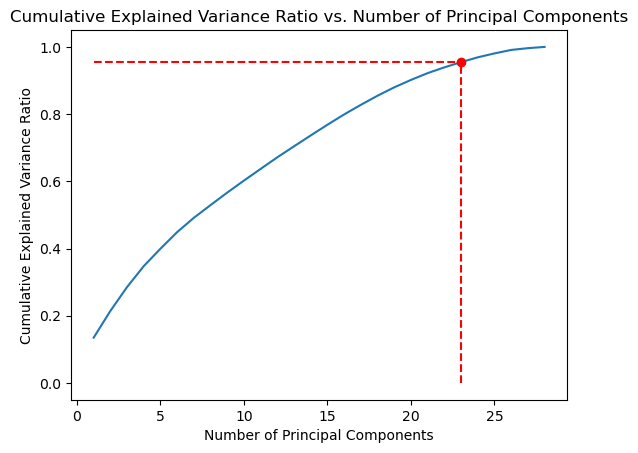

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Handle missing values in numerical features
X_numeric_filled = X_numeric.fillna(X_numeric.mean())
    
# Assuming X is your dataset with shape (number of samples, number of features)
n_features = X_numeric_filled.shape[1]

# Standardize the data
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_filled)

# Perform PCA
pca = PCA(n_components=n_features)
pca.fit(X_numeric_scaled)

# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, n_features + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')

index_95 = np.argmax(cumulative_variance_ratio >= 0.95)

plt.plot(index_95 + 1, cumulative_variance_ratio[index_95], 'ro')

# Add dashed lines
plt.plot([1, index_95 + 1], [cumulative_variance_ratio[index_95], cumulative_variance_ratio[index_95]], 'r--')
plt.plot([index_95 + 1, index_95 + 1], [0, cumulative_variance_ratio[index_95]], 'r--')

plt.show()


In [ ]:
# Apply Incremental PCA to numerical data
batch_size = 1000
principal_components = 24
n_batches = len(X_numeric_scaled) // batch_size + 1
ipca = IncrementalPCA(n_components=principal_components)

X_pca_numeric = None
for batch in range(n_batches):
    start = batch * batch_size
    end = min((batch + 1) * batch_size, len(X_numeric_scaled))
    X_batch = X_numeric_scaled[start:end]
    X_batch_pca = ipca.partial_fit(X_batch)
    if X_pca_numeric is None:
        X_pca_numeric = X_batch_pca
    else:
        X_pca_numeric = ipca.transform(X_batch)

# Compute the absolute values of the component loadings for numerical features
component_loadings_numeric = np.abs(ipca.components_)

# Calculate the average component loadings for each numerical feature
# -- represents the average contribution of each numerical feature to the principal components
average_loadings_numeric = np.mean(component_loadings_numeric, axis=0)

# Sort the numerical features based on the average loadings in ascending order
sorted_features_indices_numeric = np.argsort(average_loadings_numeric)

# Determine the least important numerical features to remove
components_to_remove = (X_numeric_scaled.shape[1] - principal_components)
least_important_features_indices_numeric = sorted_features_indices_numeric[:components_to_remove]

# Get the real names of the least important numerical features
least_important_numerical_features = [X_numeric_filled.columns[idx] 
                                      for idx in least_important_features_indices_numeric]


print("Least important numerical features to remove:")
for feature in least_important_numerical_features[:components_to_remove]:
    print(f'Feature removed: {feature}')
    try:
        X.drop(feature,axis=1, inplace=True)
    except KeyError:
        pass


In [29]:
X

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LoanDuration,MonthlyPayment,Education,EmploymentDurationCurrentEmployer,HomeOwnershipType,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,IncomeFromHelp,IncomePrincipal
0,970,1150,5.0,False,4.0,60,62.05,4.0,MoreThan5Years,1.0,...,969.16,1187.91,1155.84,500.0,590.95,0.0,NaN,NaN,53.0,301.0
1,1295,0,1705.0,False,1.0,60,84.75,5.0,MoreThan5Years,1.0,...,563.59,360.07,2436.41,1800.0,445.26,1.0,NaN,NaN,0.0,900.0
2,2700,565,5835.0,True,4.0,60,268.57,4.0,UpTo3Years,8.0,...,6537.00,1708.47,0.00,0.0,0.00,0.0,NaN,NaN,0.0,600.0
3,1115,0,385.0,True,3.0,60,63.53,2.0,UpTo5Years,2.0,...,464.73,355.92,1035.27,0.0,0.00,1.0,NaN,NaN,0.0,863.0
4,305,0,785.0,True,4.0,48,101.19,4.0,UpTo1Year,3.0,...,0.01,0.00,1089.99,0.0,0.00,0.0,NaN,NaN,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,2000,0,0.0,True,1.0,60,76.11,3.0,UpTo5Years,3.0,...,0.00,0.00,2000.00,0.0,0.00,0.0,NaN,NaN,0.0,1500.0
179231,6215,70,1155.0,False,4.0,60,232.40,4.0,MoreThan5Years,4.0,...,7440.00,2664.67,0.00,2500.0,986.78,0.0,NaN,NaN,0.0,2172.0
179232,430,0,1055.0,False,1.0,60,93.08,3.0,MoreThan5Years,8.0,...,1485.00,186.41,0.00,2425.0,2749.65,1.0,NaN,NaN,0.0,1550.0
179233,3000,0,0.0,True,1.0,60,88.71,3.0,UpTo3Years,1.0,...,3000.00,1974.70,0.00,0.0,0.00,0.0,NaN,NaN,0.0,350.0


In [30]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LoanDuration', 'MonthlyPayment', 'Education',
       'EmploymentDurationCurrentEmployer', 'HomeOwnershipType',
       'IncomeFromLeavePay', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'ActiveScheduleFirstPaymentReached',
       'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'ModelVersion', 'Rating', 'Status', 'Restructured', 'WorseLateCategory',
       'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'NextPaymentNr',
       'NrOfScheduledPayments', 'IncomeFromHelp', 'IncomePrincipal'],
      dtype='object')

In [31]:
df.shape

(179235, 41)

In [33]:
import pandas as pd
from scipy.stats import pointbiserialr

features_categoricas = df.select_dtypes(include=['object', 'bool'])

# Filter out categorical features with only a single unique value
features_categoricas = features_categoricas.loc[:, features_categoricas.nunique() > 1]

# Apply one-hot encoding 
features_encoded = pd.get_dummies(features_categoricas)
original_feature_names = features_categoricas.columns

variavel_destino = df['Status'].astype(bool)

removed_features = []


for feature_idx, feature in enumerate(features_encoded.columns):
    corr, p_value = pointbiserialr(features_encoded[feature], variavel_destino)
    abs_corr = abs(corr)
    print(f'Correlation to {feature}: {abs_corr:.2f}')
    print(f'Valor-p to {feature}: {p_value:.2f}')
    print()

    if abs_corr < 0.1:
        removed_features.append(feature_idx)

print("Features to be removed:")
for feature_idx in removed_features:
    if feature_idx < len(original_feature_names):
        feature_name = original_feature_names[feature_idx]
        print(feature_name)
        df.drop(feature_name, axis=1, inplace=True)

Correlation to NewCreditCustomer: 0.14
Valor-p to NewCreditCustomer: 0.00

Correlation to ActiveScheduleFirstPaymentReached: 0.24
Valor-p to ActiveScheduleFirstPaymentReached: 0.00

Correlation to Restructured: 0.13
Valor-p to Restructured: 0.00

Correlation to EmploymentDurationCurrentEmployer_MoreThan5Years: 0.00
Valor-p to EmploymentDurationCurrentEmployer_MoreThan5Years: 0.83

Correlation to EmploymentDurationCurrentEmployer_Other: 0.05
Valor-p to EmploymentDurationCurrentEmployer_Other: 0.00

Correlation to EmploymentDurationCurrentEmployer_Retiree: 0.02
Valor-p to EmploymentDurationCurrentEmployer_Retiree: 0.00

Correlation to EmploymentDurationCurrentEmployer_TrialPeriod: 0.03
Valor-p to EmploymentDurationCurrentEmployer_TrialPeriod: 0.00

Correlation to EmploymentDurationCurrentEmployer_UpTo1Year: 0.01
Valor-p to EmploymentDurationCurrentEmployer_UpTo1Year: 0.00

Correlation to EmploymentDurationCurrentEmployer_UpTo2Years: 0.10
Valor-p to EmploymentDurationCurrentEmployer_UpTo2

In [34]:
df.shape


(179235, 37)

### Data Cleaning

#### Visualizar distribuição das features

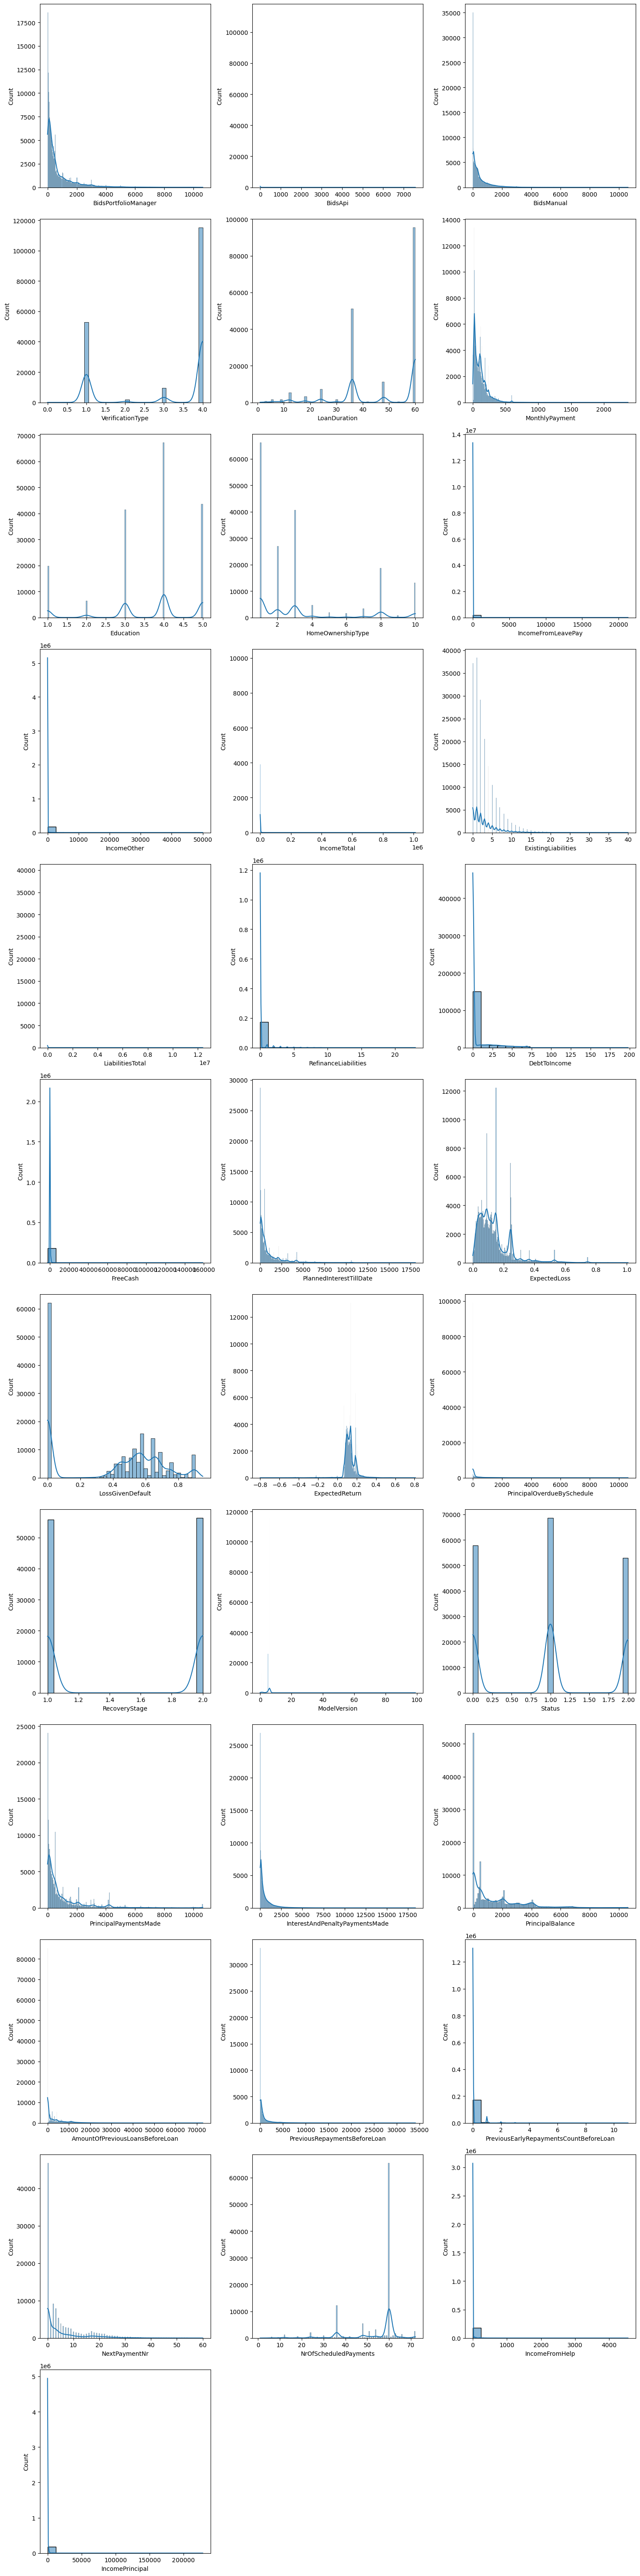

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_features = df.select_dtypes(include=['int', 'float'])

# Calculate subplot dimensions based on the number of numeric features
num_features = len(numeric_features.columns)
num_rows = int((num_features - 1) / 3) + 1
num_cols = min(num_features, 3)


plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(numeric_features.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(numeric_features[col], kde=True)

plt.tight_layout()
plt.show()


In [45]:
# Dados desbalanceados, necessário balancear

#### Preparar dados


In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Separar os recursos (features) e a variável alvo
X = df.drop('Status', axis=1)
y = df['Status']

# Select categorical features
categorical_features = X.select_dtypes(include=['object'])

# Apply one-hot encoding to categorical features
encoded_features = pd.get_dummies(categorical_features)

# Concatenate encoded features with numerical features
X_encoded = pd.concat([X.drop(categorical_features.columns, axis=1), encoded_features], axis=1)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Balanceamento dos dados usando oversampling da classe minoritária
X_train_balanced, y_train_balanced = resample(X_train_imputed[y_train == 0], y_train[y_train == 0],
                                             n_samples=X_train_imputed[y_train == 1].shape[0],
                                             replace=True, random_state=42)
X_train_balanced = np.concatenate([X_train_balanced, X_train_imputed[y_train == 1]])
y_train_balanced = np.concatenate([y_train_balanced, y_train[y_train == 1]])

# Escalonamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_imputed)


In [46]:
df. columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LoanDuration', 'MonthlyPayment', 'Education',
       'EmploymentDurationCurrentEmployer', 'HomeOwnershipType',
       'IncomeFromLeavePay', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'ActiveScheduleFirstPaymentReached',
       'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'ModelVersion', 'Status', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'NextPaymentNr',
       'NrOfScheduledPayments', 'IncomeFromHelp', 'IncomePrincipal'],
      dtype='object')

#### como escolher as edges

In [63]:
# Select categorical features
features_categoricas = df.select_dtypes(include=['object', bool])
import pandas as pd

# Split the features into categorical and numeric
categorical_features = features_categoricas.columns  # List of categorical feature names
numeric_features = X_numeric_filled.columns  # List of numeric feature names

categorical_features = list(categorical_features)
numeric_features = list(numeric_features)

# Concatenate categorical and numeric features
all_features = categorical_features + numeric_features + ['Status']

df_selected = df[all_features]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

threshold = 0.5

# Iterate over the columns of the correlation matrix
for column in correlation_matrix.columns:
    # Find the columns where the absolute correlation is above the threshold and below 1
    correlated_columns = correlation_matrix.index[(abs(correlation_matrix[column]) > threshold) & (abs(correlation_matrix[column]) < 1)]
    
   
    for correlated_column in correlated_columns:
        correlation_value = correlation_matrix.loc[correlated_column, column]
        print(f"Correlation between '{correlated_column}' and '{column}': {correlation_value}")


Correlation between 'AmountOfPreviousLoansBeforeLoan' and 'NewCreditCustomer': -0.6321225905883127
Correlation between 'NrOfScheduledPayments' and 'LoanDuration': 0.664060859817329
Correlation between 'PrincipalBalance' and 'MonthlyPayment': 0.5188602303883078
Correlation between 'IncomePrincipal' and 'FreeCash': 0.5020193154542382
Correlation between 'PrincipalOverdueBySchedule' and 'PlannedInterestTillDate': 0.5012360124196602
Correlation between 'PrincipalPaymentsMade' and 'PlannedInterestTillDate': 0.6583503567799825
Correlation between 'PlannedInterestTillDate' and 'PrincipalOverdueBySchedule': 0.5012360124196602
Correlation between 'PlannedInterestTillDate' and 'PrincipalPaymentsMade': 0.6583503567799825
Correlation between 'MonthlyPayment' and 'PrincipalBalance': 0.5188602303883078
Correlation between 'NewCreditCustomer' and 'AmountOfPreviousLoansBeforeLoan': -0.6321225905883127
Correlation between 'LoanDuration' and 'NrOfScheduledPayments': 0.664060859817329
Correlation between

In [121]:
import pandas as pd

# Select categorical features
features_categoricas = df.select_dtypes(include=['object', bool])

# Split the features into categorical and numeric
categorical_features = list(features_categoricas.columns)
numeric_features = list(X_numeric_filled.columns)

# Concatenate categorical and numeric features
all_features = categorical_features + numeric_features + ['Status']

df_selected = df[all_features]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Set the threshold for correlation
threshold = 0.5

set_valores = set()  

# Iterate over the columns of the correlation matrix
for column in correlation_matrix.columns:
    
    correlated_columns = correlation_matrix.index[(abs(correlation_matrix[column]) > threshold) & (abs(correlation_matrix[column]) < 1)]
    
    for correlated_column in correlated_columns:
        correlation_value = correlation_matrix.loc[correlated_column, column]
        set_valores.add(correlated_column)
        print(f"Correlation between '{correlated_column}' and 'Status': {correlation_value}")

#print(set_valores)

Correlation between 'AmountOfPreviousLoansBeforeLoan' and 'Status': -0.6321225905883127
Correlation between 'NrOfScheduledPayments' and 'Status': 0.664060859817329
Correlation between 'PrincipalBalance' and 'Status': 0.5188602303883078
Correlation between 'IncomePrincipal' and 'Status': 0.5020193154542382
Correlation between 'PrincipalOverdueBySchedule' and 'Status': 0.5012360124196602
Correlation between 'PrincipalPaymentsMade' and 'Status': 0.6583503567799825
Correlation between 'PlannedInterestTillDate' and 'Status': 0.5012360124196602
Correlation between 'PlannedInterestTillDate' and 'Status': 0.6583503567799825
Correlation between 'MonthlyPayment' and 'Status': 0.5188602303883078
Correlation between 'NewCreditCustomer' and 'Status': -0.6321225905883127
Correlation between 'LoanDuration' and 'Status': 0.664060859817329
Correlation between 'FreeCash' and 'Status': 0.5020193154542382


## Model

### Classificação baseada em Naive Bayes

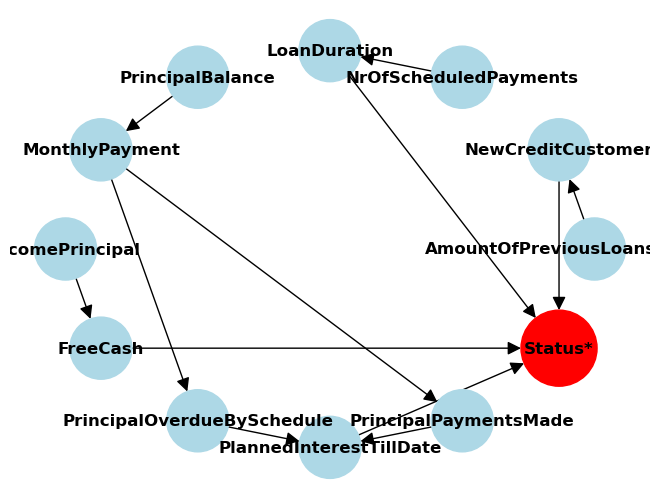

In [88]:
from pgmpy.models import BayesianModel
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges
edges = [('AmountOfPreviousLoansBeforeLoan', 'NewCreditCustomer'),
         ('NrOfScheduledPayments', 'LoanDuration'),
         ('PrincipalBalance', 'MonthlyPayment'),
         ('IncomePrincipal', 'FreeCash'),
         ('PrincipalOverdueBySchedule', 'PlannedInterestTillDate'),
         ('PrincipalPaymentsMade', 'PlannedInterestTillDate'),
         ('MonthlyPayment', 'PrincipalOverdueBySchedule'),
         ('MonthlyPayment', 'PrincipalPaymentsMade'),
         ('NewCreditCustomer', 'Status'),
         ('LoanDuration', 'Status'),
         ('FreeCash', 'Status'),
         ('PlannedInterestTillDate', 'Status')]

# Create the Bayesian model
model = BayesianModel(edges)

pos = nx.circular_layout(model)

node_labels = {node: node if node != 'Status' else node + '*' for node in model.nodes()}
node_colors = ['lightblue' if node != 'Status' else 'red' for node in model.nodes()]
node_sizes = [2000 if node != 'Status' else 3000 for node in model.nodes()]

nx.draw(model, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=12, font_weight='bold', arrowsize=20, labels=node_labels)
plt.show()



### Análise

In [97]:

features = ['AmountOfPreviousLoansBeforeLoan', 'NewCreditCustomer',
            'NrOfScheduledPayments', 'LoanDuration',
            'PrincipalBalance', 'MonthlyPayment',
            'IncomePrincipal', 'FreeCash',
            'PrincipalOverdueBySchedule', 'PlannedInterestTillDate',
            'PrincipalPaymentsMade', 'PlannedInterestTillDate',
            'MonthlyPayment', 'PrincipalOverdueBySchedule',
            'MonthlyPayment', 'PrincipalPaymentsMade',
            'NewCreditCustomer', 'Status',
            'LoanDuration', 'Status',
            'FreeCash', 'Status','PlannedInterestTillDate', 'Status']

features1= [] 

for i in features:
    if i not in features1:
        features1.append(i)


df_copy = df[features1].copy()
df_copy


,AmountOfPreviousLoansBeforeLoan,NewCreditCustomer,NrOfScheduledPayments,LoanDuration,PrincipalBalance,MonthlyPayment,IncomePrincipal,FreeCash,PrincipalOverdueBySchedule,PlannedInterestTillDate,PrincipalPaymentsMade,Status
0,500.0,False,NaN,60,1155.84,62.05,301.0,10.92,1155.84,1251.98,969.16,1
1,1800.0,False,NaN,60,2436.41,84.75,900.0,78.80,2436.41,3000.00,563.59,1
2,0.0,True,NaN,60,0.00,268.57,600.0,349.43,0.00,9100.00,6537.00,2
3,0.0,True,NaN,60,1035.27,63.53,863.0,449.47,1035.27,1500.00,464.73,1
4,0.0,True,NaN,48,1089.99,101.19,697.0,95.81,1089.99,1090.00,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179230,0.0,True,NaN,60,2000.00,76.11,1500.0,1393.89,2000.00,2000.00,0.00,1
179231,2500.0,False,NaN,60,0.00,232.40,2172.0,5.51,NaN,2664.67,7440.00,2
179232,2425.0,False,NaN,60,0.00,93.08,1550.0,67.92,NaN,186.41,1485.00,2
179233,0.0,True,NaN,60,0.00,88.71,350.0,11.29,0.00,3000.00,3000.00,2


In [103]:

from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator

# Select a subset of the original dataset
subset_size = 1000  
subset = df_copy.sample(n=subset_size)  
subset_df = pd.DataFrame(subset, columns=df_copy.columns)

model = BayesianModel(edges)

# Using a MLE estimator to obtain the CPDs tables
model.fit(subset_df, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)

# Using a Bayesian estimator to obtain the CPDs tables
model.fit(subset_df, estimator=BayesianEstimator, prior_type="BDeu")
for cpd in model.get_cpds():
    print(cpd)


C:\Users\alice\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(0.0)        | 0.421927   |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(108.6139)   | 0          |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(127.8228)   | 0          |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(240.0)      | 0          |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(300.3896)   | 0          |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(319.5586)   | 0          |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(319.5736)   | 0          |
+---------------------------------------------+------------+
| AmountOfPreviousLoansBeforeLoan(500.0)      | 0          |
+-----------------------

MemoryError: Unable to allocate 28.6 GiB for an array with shape (775, 300093) and data type <U33

In [149]:
from pgmpy.factors.discrete import TabularCPD

# Define CPD for 'AmountOfPreviousLoansBeforeLoan' node
cpd_amount_of_loans = TabularCPD(variable='AmountOfPreviousLoansBeforeLoan', variable_card=3,
                                 values=[[0.3], [0.4], [0.3]])

# Add the CPD to the model
model.add_cpds(cpd_amount_of_loans)
from pgmpy.factors.discrete import TabularCPD

# Define CPD for 'AmountOfPreviousLoansBeforeLoan' node
cpd_amount_of_loans = TabularCPD(variable='AmountOfPreviousLoansBeforeLoan', variable_card=3,
                                 values=[[0.3], [0.4], [0.3]])
model.add_cpds(cpd_amount_of_loans)

# Define CPD for 'NewCreditCustomer' node
cpd_new_credit_customer = TabularCPD(variable='NewCreditCustomer', variable_card=2,
                                     values=[[0.7], [0.3]])
model.add_cpds(cpd_new_credit_customer)

# Define CPD for 'NrOfScheduledPayments' node
cpd_scheduled_payments = TabularCPD(variable='NrOfScheduledPayments', variable_card=3,
                                    values=[[0.4], [0.5], [0.1]])
model.add_cpds(cpd_scheduled_payments)

# Define CPD for 'LoanDuration' node
cpd_loan_duration = TabularCPD(variable='LoanDuration', variable_card=3,
                               values=[[0.3], [0.4], [0.3]])
model.add_cpds(cpd_loan_duration)

# Define CPD for 'PrincipalBalance' node
cpd_principal_balance = TabularCPD(variable='PrincipalBalance', variable_card=3,
                                   values=[[0.2], [0.5], [0.3]])
model.add_cpds(cpd_principal_balance)

# Define CPD for 'MonthlyPayment' node
cpd_monthly_payment = TabularCPD(variable='MonthlyPayment', variable_card=3,
                                 values=[[0.3], [0.4], [0.3]])
model.add_cpds(cpd_monthly_payment)

# Define CPD for 'IncomePrincipal' node
cpd_income_principal = TabularCPD(variable='IncomePrincipal', variable_card=2,
                                  values=[[0.6], [0.4]])
model.add_cpds(cpd_income_principal)

# Define CPD for 'FreeCash' node
cpd_free_cash = TabularCPD(variable='FreeCash', variable_card=2,
                           values=[[0.8], [0.2]])
model.add_cpds(cpd_free_cash)

# Define CPD for 'PrincipalOverdueBySchedule' node
cpd_overdue_schedule = TabularCPD(variable='PrincipalOverdueBySchedule', variable_card=2,
                                  values=[[0.6], [0.4]])
model.add_cpds(cpd_overdue_schedule)

# Define CPD for 'PlannedInterestTillDate' node
cpd_planned_interest = TabularCPD(variable='PlannedInterestTillDate', variable_card=2,
                                  values=[[0.6], [0.4]])
model.add_cpds(cpd_planned_interest)

# Define CPD for 'PrincipalPaymentsMade' node
cpd_principal_payments = TabularCPD(variable='PrincipalPaymentsMade', variable_card=2,
                                    values=[[0.5], [0.5]])
model.add_cpds(cpd_principal_payments)



# Define CPD for 'Status' node
cpd_status = TabularCPD(variable='Status', variable_card=2,
                        values=[[0.7, 0.3, 0.6, 0.4, 0.1, 0.9, 0.2, 0.8, 0.6, 0.4, 0.5, 0.5, 0.4, 0.6, 0.3, 0.7],
                                [0.3, 0.7, 0.4, 0.6, 0.9, 0.1, 0.8, 0.2, 0.4, 0.6, 0.5, 0.5, 0.6, 0.4, 0.7, 0.3]],
                        evidence=['NewCreditCustomer', 'LoanDuration', 'FreeCash', 'PlannedInterestTillDate'],
                        evidence_card=[2, 2, 2, 2])

# Add the CPD to the model
model.add_cpds(cpd_status)



# Define CPD for 'MonthlyPayment' node
cpd_monthly_payment = TabularCPD(variable='MonthlyPayment', variable_card=3,
                                 values=[[0.3], [0.4], [0.3]])
model.add_cpds(cpd_monthly_payment)

# Define CPD for 'PrincipalOverdueBySchedule' node
cpd_overdue_schedule = TabularCPD(variable='PrincipalOverdueBySchedule', variable_card=2,
                                  values=[[0.6], [0.4]])
model.add_cpds(cpd_overdue_schedule)

# Define CPD for 'PrincipalPaymentsMade' node
cpd_principal_payments = TabularCPD(variable='PrincipalPaymentsMade', variable_card=2,
                                    values=[[0.5], [0.5]])
model.add_cpds(cpd_principal_payments)

# Define CPD for 'Status' node
cpd_status = TabularCPD(variable='Status', variable_card=2,
                        values=[[0.7, 0.3, 0.6, 0.4, 0.1, 0.9, 0.2, 0.8, 0.6, 0.4, 0.5, 0.5, 0.4, 0.6, 0.3, 0.7],
                                [0.3, 0.7, 0.4, 0.6, 0.9, 0.1, 0.8, 0.2, 0.4, 0.6, 0.5, 0.5, 0.6, 0.4, 0.7, 0.3]],
                        evidence=['NewCreditCustomer', 'LoanDuration', 'FreeCash', 'PlannedInterestTillDate'],
                        evidence_card=[2, 2, 2, 2])

# Add the CPDs to the model
model.add_cpds(cpd_monthly_payment, cpd_overdue_schedule, cpd_principal_payments, cpd_status)





### Demonstração da utilização da rede para obtenção de inferências

In [150]:
# Criar instância do VariableElimination
inference = VariableElimination(model)

# Especificar as variáveis de evidência e a variável alvo
evidence = {'NewCreditCustomer': True}
target_variable = 'Status'

# Realizar a inferência
inferred = inference.query([target_variable], evidence=evidence)

# Acessar as probabilidades inferidas
probability = inferred[target_variable]
print(probability)

ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.

In [151]:
#Probabilidade da variável Status dado que PrincipalPaymentsMade é maior que 1000:
# Criar instância do VariableElimination

inference = VariableElimination(model)
evidence = {'PrincipalPaymentsMade': 1000}
target_variable = 'Status'

inferred = inference.query([target_variable], evidence=evidence)

probability = inferred[target_variable]
print(probability)


ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.

In [152]:
#Probabilidade da variável Status dado que LoanDuration é igual a 12 e NewCreditCustomer é verdadeiro:
# Criar instância do VariableElimination
inference = VariableElimination(model)
evidence = {'LoanDuration': 12, 'NewCreditCustomer': True}
target_variable = 'Status'


inferred = inference.query([target_variable], evidence=evidence)

probability = inferred[target_variable]
print(probability)


ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.

In [153]:
#Probabilidade conjunta da variável Status e LoanDuration dado que NewCreditCustomer é verdadeiro:
# Criar instância do VariableElimination
inference = VariableElimination(model)
evidence = {'NewCreditCustomer': True}
target_variables = ['Status', 'LoanDuration']

inferred = inference.query([target_variable], evidence=evidence)

probability = inferred[target_variable]
print(probability)



ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.

In [154]:
#Probabilidade conjunta da variável Status e MonthlyPayment dado que PrincipalBalance está entre 1000 e 2000:
# Criar instância do VariableElimination
inference = VariableElimination(model)
evidence = {'PrincipalBalance': (1000, 2000)}
target_variables = ['Status', 'MonthlyPayment']

inferred = inference.query([target_variable], evidence=evidence)

probability = inferred[target_variable]
print(probability)


ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.

In [155]:
# Probabilidade da variável Status dado que AmountOfPreviousLoansBeforeLoan é menor ou igual a 2 e NrOfScheduledPayments é maior que 12:
# Criar instância do VariableElimination
inference = VariableElimination(model)
evidence = {'AmountOfPreviousLoansBeforeLoan': (None, 2), 'NrOfScheduledPayments': (12, None)}
target_variable = 'Status'

inferred = inference.query([target_variable], evidence=evidence)

probability = inferred[target_variable]
print(probability)


ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.

In [156]:
#Probabilidade conjunta da variável Status e MonthlyPayment, condicionada à evidência de que PrincipalOverdueBySchedule é maior que 0 e AmountOfPreviousLoansBeforeLoan é igual a 3:
# Criar instância do VariableElimination
inference = VariableElimination(model)
evidence = {'PrincipalOverdueBySchedule': (0, None), 'AmountOfPreviousLoansBeforeLoan': 3}
target_variables = ['Status', 'MonthlyPayment']

inferred = inference.query([target_variable], evidence=evidence)

probability = inferred[target_variable]
print(probability)


ValueError: CPD associated with NewCreditCustomer doesn't have proper parents associated with it.